<a href="https://colab.research.google.com/github/pelinbalci/TF_Intro/blob/main/lecture_2_convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://colab.research.google.com/github/lmoroney/mlday-tokyo/blob/master/Lab3-What-Are-Convolutions.ipynb#scrollTo=tJTHvE8Qe5nM

Pixel values * filter values:

$Pixel Values =
 \begin{pmatrix}
  0 & 64 & 128  \\
  48 & 192 & 144 \\
  142 & 226 & 168
 \end{pmatrix}$

 $Filter Values =
 \begin{pmatrix}
  -1 & 0 & -2  \\
  .5 & 4.5 & -1.5 \\
  1.5 & 2 & -3
 \end{pmatrix}$


Current pixel = 192


New Pixel =  0 * -1 + 64 * 0 + 128 * -2 + ... 

the model needs to learn different filters. if you have 2 filters (one horizontal one vertical) you need to update the weights in these filters. If you have 100 filters for one layer you need to learn(update) them all. Pooling is the ey here. You can squeze the image and take only important information by pooling. It reduces the amount of info you need to learn. 

# Basic Convolution

a basic convolution on a 2D Grey Scale image.

we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

In [5]:
i.dtype

dtype('int64')

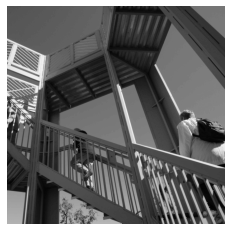

In [3]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [4]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

print(size_x, size_y)

512 512


If all the digits in the filter don't add up to 0 or 1, you should probably do a weight to get it to do so 

so, for example, if your weights are 1,1,1 1,2,1 1,1,1 They add up to 10, so you would set a weight of .1 if you want to normalize them

In [11]:
def calculate_filter_pixel(filter, weight, size_x, size_y):
  for x in range(1,size_x-1):
    for y in range(1,size_y-1):
        convolution = 0.0
        convolution = convolution + (i[x - 1, y-1] * filter[0][0])
        convolution = convolution + (i[x, y-1] * filter[0][1])
        convolution = convolution + (i[x + 1, y-1] * filter[0][2])
        convolution = convolution + (i[x-1, y] * filter[1][0])
        convolution = convolution + (i[x, y] * filter[1][1])
        convolution = convolution + (i[x+1, y] * filter[1][2])
        convolution = convolution + (i[x-1, y+1] * filter[2][0])
        convolution = convolution + (i[x, y+1] * filter[2][1])
        convolution = convolution + (i[x+1, y+1] * filter[2][2])
        convolution = convolution * weight
        if(convolution<0):
          convolution=0
        if(convolution>255):
          convolution=255
        i_transformed[x, y] = convolution
  return i_transformed

def plot_filtered_image(i_transformed):
  # Plot the image. Note the size of the axes -- they are 512 by 512
  plt.gray()
  plt.grid(False)
  plt.imshow(i_transformed)
  #plt.axis('off')
  plt.show()   

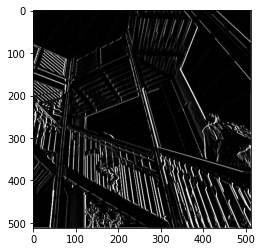

In [12]:
# this gives us horizontal lines. one row is zero
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

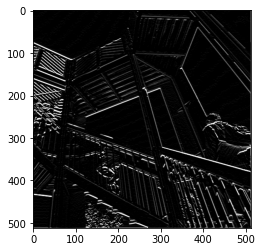

In [14]:
# this gives us vertical lines. one column is zero. 
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

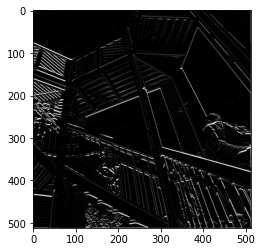

In [24]:
# trial
filter = [ [-1, 1, 0], [-2, 0, 2], [0, -1, 1]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

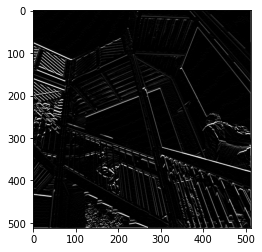

In [28]:
# trial
filter = [ [0, 0, 0], [-2, 0, 2], [-1, 1, 0]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

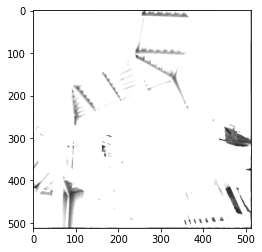

In [17]:
filter = [ [1, 1, 1], [2, 0, 2], [2, 0, 1]] # the sum is not 1
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

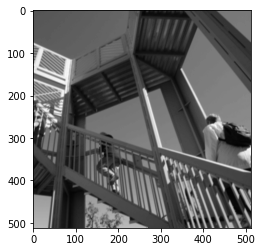

In [18]:
filter = [ [1, 1, 1], [2, 0, 2], [2, 0, 1]] # the sum is not 1
weight = 0.1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

# no transformation at all. 

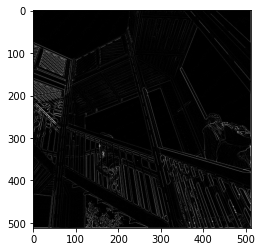

In [23]:
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
weight = 1
calculate_filter_pixel(filter, weight, size_x, size_y)
plot_filtered_image(i_transformed)

Pooling

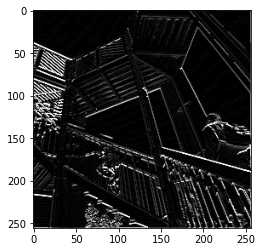

256 256


In [29]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.sort(reverse=True)
    newImage[int(x/2),int(y/2)] = pixels[0]

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()      
    

size_x_new = newImage.shape[0]
size_y_new = newImage.shape[1]

print(size_x_new, size_y_new)